In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
df=pd.read_csv('analytic.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df['center_type']=df['center_type'].map({'TYPE_C':3, 'TYPE_B':2, 'TYPE_A':1})

In [2]:
# https://towardsdatascience.com/exploring-your-data-with-just-1-line-of-python-4b35ce21a82d
# import pandas_profiling
# df.profile_report()

In [2]:
df['check_']=df['checkout_price']*-0.72895433
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,diff,check_
0,1379560,1,55,1885,136.83,152.29,0,0,177,1,2,647,56,3,2.0,15.46,-99.742821
1,1018704,2,55,1885,135.83,152.29,0,0,323,1,2,647,56,3,2.0,16.46,-99.013867
2,1196273,3,55,1885,132.92,133.92,0,0,96,1,2,647,56,3,2.0,1.00,-96.892610
3,1116527,4,55,1885,135.86,134.86,0,0,163,1,2,647,56,3,2.0,-1.00,-99.035735
4,1343872,5,55,1885,146.50,147.50,0,0,215,1,2,647,56,3,2.0,1.00,-106.791809


In [3]:
df.corr()['num_orders'].sort_values(ascending=False)[1:6]

homepage_featured        0.294490
emailer_for_promotion    0.277147
op_area                  0.176976
diff                     0.152950
city_code                0.041596
Name: num_orders, dtype: float64

In [3]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
x=df[['homepage_featured','emailer_for_promotion','op_area','diff','city_code']]
y=df['num_orders']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
model.fit(x_train,y_train)
y_pred=model.predict(x_test) 
import sklearn.metrics as metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print(metrics.r2_score(y_test,y_pred))

c:\users\anurag\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


347.3017532822418
0.1988400920696609


In [42]:
# (1)..Basic EDA for making new feature
# (1)..Feature selection
# (1)..PCA

In [13]:
#Basic EDA for making new feature:-

# checkout price badega to nu of order kamm honge

In [134]:
df.corr()['num_orders'].sort_values(ascending=False)[1:6] 

homepage_featured        0.294490
check_                   0.282108
emailer_for_promotion    0.277147
op_area                  0.176976
diff                     0.152950
Name: num_orders, dtype: float64

In [5]:
df.corr()['num_orders'].sort_values()[:5] #--->checkout price badega to nu of order kamm honge

checkout_price   -0.282108
category         -0.266118
base_price       -0.222306
cuisine          -0.177768
center_id        -0.053035
Name: num_orders, dtype: float64

<BarContainer object of 1500 artists>

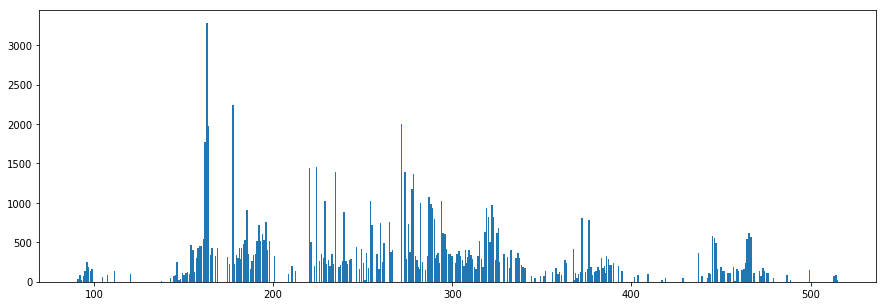

In [69]:
plt.figure(figsize=(15,5))
#plt.plot(np.arange(100,200),np.array(350)*np.ones(100,dtype=np.int),'g')
plt.bar(df['checkout_price'][500:2000],df['num_orders'][500:2000])

In [ ]:
# plt.scatter(X_test, y_test,  color='gray')
# plt.plot(X_test, y_pred, color='red', linewidth=2)
# plt.show()


# X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 
#              'residual sugar', 'chlorides', 'free sulfur dioxide',
#              'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
# y = dataset['quality'].values

# regressor.coef_
# coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
# coeff_df

# The error itself solves your problem. Just follow what it says. The predict() method takes a 2d 
# array of values you want to predict on. 
# Each item in the array is a "point" you want your model to predict on. So try,
# lin_reg_2.predict(np.array([6.5]).reshape(1, 1))

In [49]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
x=df['checkout_price'].values
y=df['num_orders'].values

In [50]:
x=df['checkout_price'].values
x=x.reshape(-1,1)

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [52]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_pred=model.predict(x_test)

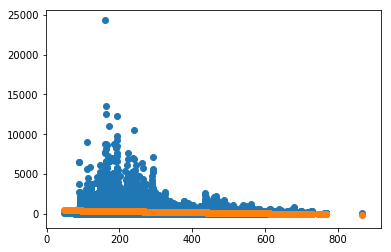

In [54]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)

In [55]:
model.coef_

array([-0.72895433])

In [5]:
# df['check_']=df['checkout_price']*-0.72895433

In [6]:
df.corr()['num_orders'].sort_values(ascending=False) #As we can see the check is correlated with num_orders

num_orders               1.000000
homepage_featured        0.294490
check_                   0.282108
emailer_for_promotion    0.277147
op_area                  0.176976
diff                     0.152950
city_code                0.041596
region_code              0.029744
meal_id                  0.010597
id                       0.000702
week                    -0.017210
center_type             -0.038199
center_id               -0.053035
cuisine                 -0.177768
base_price              -0.222306
category                -0.266118
checkout_price          -0.282108
Name: num_orders, dtype: float64

In [37]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
x=df[['homepage_featured','emailer_for_promotion','diff','check_']]
y=df['num_orders']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
model.fit(x_train,y_train)
y_pred=model.predict(x_test) 
import sklearn.metrics as metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print(metrics.r2_score(y_test,y_pred))

# previous result:-
#     356.2932652976024
#     0.17077936586634468

c:\users\anurag\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


294.49874379224394
0.4296273805645102


# PCA

In [58]:
target=df['num_orders']  # dependent and independent columns ko alag alag kra
df.drop('num_orders',axis=1,inplace=True)
print(df.columns)

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine',
       'city_code', 'region_code', 'center_type', 'op_area', 'diff', 'check_'],
      dtype='object')


In [59]:
from sklearn.preprocessing import StandardScaler
stand=StandardScaler()
stand.fit(df)
stand_data=stand.transform(df)

Text(0, 0.5, 'Variance (%)')

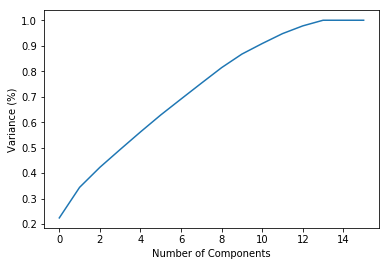

In [60]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(stand_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')

# pca(n_componets=12)

In [61]:
pca=PCA(n_components=12)
pca.fit(stand_data)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [62]:
pca_data=pca.transform(stand_data)
pca_data.shape

(456548, 12)

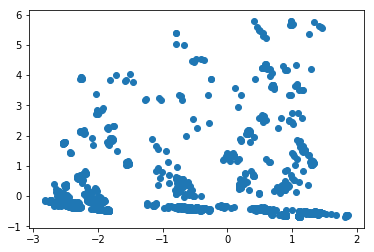

In [63]:
plt.scatter(pca_data[:2000,0],pca_data[:2000,1]) # data overfit hoga because 2000 rows me hi itna random distribution h

# after pca fit componets in model

In [64]:
x=pca_data
y=target.values
x_train,x_test,y_train,y_test=train_test_split(x,y)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print(metrics.r2_score(y_pred,y_test))

356.63183536713245
-2.4010987675133886


# but pca=2,4 pr bi check kr le uspr kaee barr accuray badd jati h

In [69]:
pca=PCA(n_components=5)
pca.fit(stand_data)
pca_data=pca.transform(stand_data)
x=pca_data
y=target.values
x_train,x_test,y_train,y_test=train_test_split(x,y)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print(metrics.r2_score(y_pred,y_test))

349.40237175947016
-2.560470801217829


In [ ]:
# After finds pca the score goes down..........................??????????????????????????????????????

# data overfit hoga because 2000 rows me hi itna random distribution h:--
#     then we use ridge/lassco/elastic net and find which one is when we used(koi condition)and which is better
#     then multivariable linear regression
#     then RandomforestRegressor/xgboost
#     then.......

In [ ]:
## Model selection

In [2]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,diff
0,1379560,1,55,1885,136.83,152.29,0,0,177,1,2,647,56,3,2.0,15.46
1,1018704,2,55,1885,135.83,152.29,0,0,323,1,2,647,56,3,2.0,16.46
2,1196273,3,55,1885,132.92,133.92,0,0,96,1,2,647,56,3,2.0,1.00
3,1116527,4,55,1885,135.86,134.86,0,0,163,1,2,647,56,3,2.0,-1.00
4,1343872,5,55,1885,146.50,147.50,0,0,215,1,2,647,56,3,2.0,1.00


In [8]:
df.corr()['num_orders'].sort_values(ascending=False)[1:8]

homepage_featured        0.294490
check_                   0.282108
emailer_for_promotion    0.277147
op_area                  0.176976
diff                     0.152950
city_code                0.041596
region_code              0.029744
Name: num_orders, dtype: float64

In [27]:
model=LinearRegression(fit_intercept=True)
x=df[['homepage_featured','check_','emailer_for_promotion','op_area','diff']]
y=df[['num_orders']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test) 
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

print(np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print(metrics.r2_score(y_test,y_pred))

0.22536541648237862
0.2206398541336887
355.83963546053195
0.2206398541336887


In [28]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model,x_train,y_train,cv=8))
print(cross_val_score(model,x_train,y_train,cv=8).mean())

[0.22888759 0.23045994 0.21635946 0.23360597 0.22091835 0.22455019
 0.22932923 0.21967366]
0.2254730485867757


# overfitting is not here so focus on improving the score

In [29]:
from sklearn.linear_model import RidgeCV
model=RidgeCV()
model.fit(x_train,y_train)
y_pred=model.predict(x_test) 
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

print(np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print(metrics.r2_score(y_test,y_pred))

0.22536540453554543
0.22064101469236463
355.8393705169547
0.22064101469236463


In [30]:
model.alpha_

10.0

In [204]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=42,max_depth=7)
x=df[['homepage_featured','check_','emailer_for_promotion','op_area'
     ,'category','cuisine','week']]
y=df[['num_orders']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test) 
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
print(metrics.r2_score(y_test,y_pred))

0.6199030993816887
0.6042001546791866
0.6042001546791866


In [182]:
model.feature_importances_

array([0.1698498 , 0.16460838, 0.07845292, 0.12876651, 0.32425015,
       0.11036826, 0.02370397])

In [203]:
# For visulize the regression tree:------->>>>>>>>

# import pydotplus
# from IPython.display import Image
# dot_data = tree.export_graphviz(model, out_file=None)

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())

In [6]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=42,max_depth=15,min_impurity_decrease=1)
x=df[['homepage_featured','center_type','emailer_for_promotion','op_area'
     ,'category','cuisine','region_code','category']]
y=df[['num_orders']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test) 
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
print(metrics.r2_score(y_test,y_pred))

TypeError: __init__() got an unexpected keyword argument 'n_estimators'

In [ ]:

# emailer_for_promotion 0.07456675051458803
# homepage_featured 0.09727528878171893
# center_type 0.6660258208158177
# op_area 1.1917766269997325
# cuisine 1.2335880177095118
# category 15.43030014182472
# region_code 311.214979829968
# week 1724.3182247648633
# center_id 2113.7002263559316
# diff 2351.8430427101493
# city_code 4381.889495073495
# check_ 12429.117367892566
# checkout_price 23390.507731939237
# base_price 25829.54843370355

# make descion tree on above feature based